# Analysis of NBA Datasets

## Introduction

It is not surprising that NBA has produced many talents and legends over the years. It is a stage where worlds one of the most popular sports is played at the highest level. With the professionalism in the NBA comes very large data and statistics. There exists databases that include raw data in which can be found any answer to any question related to basketball. However, because of how there are so much data, these datasets are overwhelming to go through. Thus, we as a group made it our aim to answer some interesting questions that one might have or wonder about NBA by analyzing these datasets. In the end, we plan to somewhat show how NBA has changed over the few years as simply as possible.

## Questions

As a group, the problems we wanted to have answered at the end of this project are as follows:

1.   How can we compare MVP (Most Valuable Player) award candidate's overall contribution to their team in the last decade by creating a mathematical model that calculates its own original "contribution score"?

2. How does a team's average age affect the win rate of their regular reason in the last two decades? Is there a correlation?

3. What is the statistical jump of the players who won the MIP (Most improved player award) between the year they are awarded and prior? This question will include the data for the last two decades.

By answering these questions, we hope that it will be easier to see how the best players in the best stage of basketball are contributing to their team. Does the age of the players in a team play an important role in the team's performance throughout the season? How does the rising stars in basketball perform the year after they are awarded the "MIP"? We believe that our answers to these questions after analyzing related datasets will make it easier to grasp how NBA has changed in the last years rather than going through overwhelmingly large datasets.


## Utilized Datasets

The used datasets throughout this project can be found below:

*   [Nba Stats](https://www.nba.com/stats/)
*   [ESPN Stats](https://www.espn.com/nba/stats)
*   [Basketball Teams and Leagues (Kaggle)](https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues)
*   [NBA Players All Seasons (Kaggle)](https://www.kaggle.com/justinas/nba-players-data)

In order to be able to answer the questions we mentioned above, we needed very detailed datasets. Every possible data we need about any team or player in a specific season are in these datasets and they are more than enough for us to successfully answer our questions.




## Data Exploration


In [17]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
filename = "./datasets/players_stats_by_season_full_details.csv"
df = pd.read_csv(filename)
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics


## 1st Question
#### How can we compare MVP (Most Valuable Player) award candidate's overall contribution to their team in the last decade by creating a mathematical model that calculates its own original "contribution score"?

We have created a contribtion score by looking at the different approaches of NBA's best analytics for measure a player's effect to the game. We'll use that metric to compare the recent MVPs and their respective runner ups.


Contribution Score Metric = (Points)+(Offensive Rebounds)+0.5*(Defensive rebounds)+1.4(Steals)+2.3*(Assists)+(Blocked Shots)-0.2*(Free Throws Missed) – 0.2*(Personal Fouls)-1.4(Turnovers)

In [19]:
df_NBA = df.loc[df['League'] == 'NBA'] # Gettings rows with the value "NBA" for "League"

In [20]:
# The list of MVP's were found on "https://en.wikipedia.org/wiki/NBA_Most_Valuable_Player_Award"

df_mvp = df_NBA[(
     (df_NBA["Season"] == "2019 - 2020") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "Giannis Antetokounmpo") |
     (df_NBA["Season"] == "2018 - 2019") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "Giannis Antetokounmpo") |
     (df_NBA["Season"] == "2017 - 2018") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "James Harden") |
     (df_NBA["Season"] == "2016 - 2017") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "Russell Westbrook") |
     (df_NBA["Season"] == "2015 - 2016") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "Stephen Curry") |
     (df_NBA["Season"] == "2014 - 2015") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "Stephen Curry") |
     (df_NBA["Season"] == "2013 - 2014") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "Kevin Durant") |
     (df_NBA["Season"] == "2012 - 2013") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "LeBron James") |
     (df_NBA["Season"] == "2011 - 2012") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "LeBron James") |
     (df_NBA["Season"] == "2010 - 2011") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "Derrick Rose")
  )]
df_mvp
# The list of the MVPs for the past 10 years

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
11852,NBA,2010 - 2011,Regular_Season,Derrick Rose,CHI,81,3025.8,711,1597,128,...,"Oct 4, 1988",6-3,191.0,200.0,91.0,United States,Simeon Career Academy,1.0,1.0,Chicago Bulls
14705,NBA,2011 - 2012,Regular_Season,LeBron James,MIA,62,2326.2,621,1169,54,...,"Dec 30, 1984",6-8,203.0,250.0,113.0,United States,St. Vincent St. Mary High School,1.0,1.0,Cleveland Cavaliers
18719,NBA,2012 - 2013,Regular_Season,LeBron James,MIA,76,2877.1,765,1354,103,...,"Dec 30, 1984",6-8,203.0,250.0,113.0,United States,St. Vincent St. Mary High School,1.0,1.0,Cleveland Cavaliers
22840,NBA,2013 - 2014,Regular_Season,Kevin Durant,OKC,81,3121.7,849,1688,192,...,"Sep 29, 1988",6-9,206.0,240.0,109.0,United States,Montrose Christian School,1.0,2.0,Seattle SuperSonics
26813,NBA,2014 - 2015,Regular_Season,Stephen Curry,GSW,80,2613.2,653,1341,286,...,"Mar 14, 1988",6-3,191.0,190.0,86.0,United States,Charlotte Christian School,1.0,7.0,Golden State Warriors
31085,NBA,2015 - 2016,Regular_Season,Stephen Curry,GSW,79,2700.0,805,1598,402,...,"Mar 14, 1988",6-3,191.0,190.0,86.0,United States,Charlotte Christian School,1.0,7.0,Golden State Warriors
35279,NBA,2016 - 2017,Regular_Season,Russell Westbrook,OKC,81,2801.7,824,1941,200,...,"Nov 12, 1988",6-3,191.0,200.0,91.0,United States,Leuzinger High School,1.0,4.0,Seattle SuperSonics
39940,NBA,2017 - 2018,Regular_Season,James Harden,HOU,72,2550.8,651,1449,265,...,"Aug 26, 1989",6-5,196.0,220.0,100.0,United States,Artesia High School,1.0,3.0,Oklahoma City Thunder
45034,NBA,2018 - 2019,Regular_Season,Giannis Antetokounmpo,MIL,72,2358.4,721,1247,52,...,"Dec 6, 1994",6-11,211.0,242.0,110.0,Greece / Nigeria,NaN,1.0,15.0,Milwaukee Bucks
51699,NBA,2019 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,89,...,"Dec 6, 1994",6-11,211.0,242.0,110.0,Greece / Nigeria,NaN,1.0,15.0,Milwaukee Bucks


In [21]:
# The list of runner ups were found on "https://en.wikipedia.org/wiki/NBA_Most_Valuable_Player_Award"
df_runnerUp = df_NBA[(
     (df_NBA["Season"] == "2019 - 2020") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "LeBron James") |
     (df_NBA["Season"] == "2018 - 2019") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "James Harden") |
     (df_NBA["Season"] == "2017 - 2018") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "LeBron James") |
     (df_NBA["Season"] == "2016 - 2017") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "James Harden") |
     (df_NBA["Season"] == "2015 - 2016") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "Kawhi Leonard") |
     (df_NBA["Season"] == "2014 - 2015") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "James Harden") |
     (df_NBA["Season"] == "2013 - 2014") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "LeBron James") |
     (df_NBA["Season"] == "2012 - 2013") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "Kevin Durant") |
     (df_NBA["Season"] == "2011 - 2012") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "Kevin Durant") |
     (df_NBA["Season"] == "2010 - 2011") & (df_NBA["Stage"] == "Regular_Season") & (df_NBA["Player"] == "Dwight Howard")
  )]
df_runnerUp
# The list of the runner ups for the past 10 years

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
11860,NBA,2010 - 2011,Regular_Season,Dwight Howard,ORL,78,2934.9,619,1044,0,...,"Dec 8, 1985",6-11,211.0,265.0,120.0,United States,Southwest Atlanta Christian Academy,1.0,1.0,Orlando Magic
14704,NBA,2011 - 2012,Regular_Season,Kevin Durant,OKC,66,2546.3,643,1297,133,...,"Sep 29, 1988",6-9,206.0,240.0,109.0,United States,Montrose Christian School,1.0,2.0,Seattle SuperSonics
18717,NBA,2012 - 2013,Regular_Season,Kevin Durant,OKC,81,3118.9,731,1433,139,...,"Sep 29, 1988",6-9,206.0,240.0,109.0,United States,Montrose Christian School,1.0,2.0,Seattle SuperSonics
22842,NBA,2013 - 2014,Regular_Season,LeBron James,MIA,77,2901.9,767,1353,116,...,"Dec 30, 1984",6-8,203.0,250.0,113.0,United States,St. Vincent St. Mary High School,1.0,1.0,Cleveland Cavaliers
26812,NBA,2014 - 2015,Regular_Season,James Harden,HOU,81,2980.8,647,1470,208,...,"Aug 26, 1989",6-5,196.0,220.0,100.0,United States,Artesia High School,1.0,3.0,Oklahoma City Thunder
31102,NBA,2015 - 2016,Regular_Season,Kawhi Leonard,SAS,72,2379.6,551,1090,129,...,"Jun 29, 1991",6-7,201.0,230.0,104.0,United States,Martin Luther King High School,1.0,15.0,Indiana Pacers
35280,NBA,2016 - 2017,Regular_Season,James Harden,HOU,81,2946.7,674,1533,262,...,"Aug 26, 1989",6-5,196.0,220.0,100.0,United States,Artesia High School,1.0,3.0,Oklahoma City Thunder
39939,NBA,2017 - 2018,Regular_Season,LeBron James,CLE,82,3025.8,857,1580,149,...,"Dec 30, 1984",6-8,203.0,250.0,113.0,United States,St. Vincent St. Mary High School,1.0,1.0,Cleveland Cavaliers
45028,NBA,2018 - 2019,Regular_Season,James Harden,HOU,78,2866.7,843,1909,378,...,"Aug 26, 1989",6-5,196.0,220.0,100.0,United States,Artesia High School,1.0,3.0,Oklahoma City Thunder
51703,NBA,2019 - 2020,Regular_Season,LeBron James,LAL,67,2316.3,643,1303,148,...,"Dec 30, 1984",6-8,203.0,250.0,113.0,United States,St. Vincent St. Mary High School,1.0,1.0,Cleveland Cavaliers


In [22]:
# We have created our formula for overall contribution score as
# Contribution Score = Points + Offensive Rebounds + 0.5 * Defensive Rebounds + 1.4 * Steals + 2.3 * Assists + Blocked Shots - 0.2 * Free Throws Missed - 0.2 * Personal Fouls - 1.2 * Turnovers
nameContributionScoreDict = { }
MVPContributionScoreList = [ ]

for i in range(len(df_mvp)):
    gamesPlayed = df_mvp.iloc[i]['GP']
    contributionScore = (df_mvp.iloc[i]['PTS'] + df_mvp.iloc[i]['ORB'] + 0.5 * df_mvp.iloc[i]['DRB'] + 1.4 * df_mvp.iloc[i]['STL'] + 2.3 * df_mvp.iloc[i]['AST'] + df_mvp.iloc[i]['BLK'] - 0.2 * (df_mvp.iloc[i]['FTA'] - df_mvp.iloc[i]['FTM']) - 0.2 * df_mvp.iloc[i]['PF'] - 1.2 * df_mvp.iloc[i]['TOV'])
    MVPContributionScoreList.append(contributionScore / gamesPlayed)


MVPContributionScoreList

[42.68888888888888,
 44.82741935483871,
 47.16842105263157,
 46.30246913580247,
 42.87749999999999,
 47.26202531645569,
 56.99629629629629,
 50.68055555555556,
 46.268055555555556,
 46.974603174603175]

In [23]:
MVPRunnerUpContributionScoreList = [ ]

for i in range(len(df_runnerUp)):
    gamesPlayed = df_runnerUp.iloc[i]['GP']
    contributionScore = (df_runnerUp.iloc[i]['PTS'] + df_runnerUp.iloc[i]['ORB'] + 0.5 * df_runnerUp.iloc[i]['DRB'] + 1.4 * df_runnerUp.iloc[i]['STL'] + 2.3 * df_runnerUp.iloc[i]['AST'] + df_runnerUp.iloc[i]['BLK'] - 0.2 * (df_runnerUp.iloc[i]['FTA'] - df_runnerUp.iloc[i]['FTM']) - 0.2 * df_runnerUp.iloc[i]['PF'] - 1.2 * df_runnerUp.iloc[i]['TOV'])
    MVPRunnerUpContributionScoreList.append(contributionScore / gamesPlayed)

MVPRunnerUpContributionScoreList

[33.44871794871795,
 38.28484848484849,
 41.62716049382716,
 43.316883116883126,
 44.574074074074076,
 32.416666666666664,
 54.31728395061728,
 50.40609756097561,
 53.88461538461539,
 50.025373134328355]

In [24]:
# getting mvp and runner up arrays
mvpNamesArr = np.array(df_mvp['Player'].values)
runnerUpNamesArr = np.array(df_runnerUp['Player'].values)

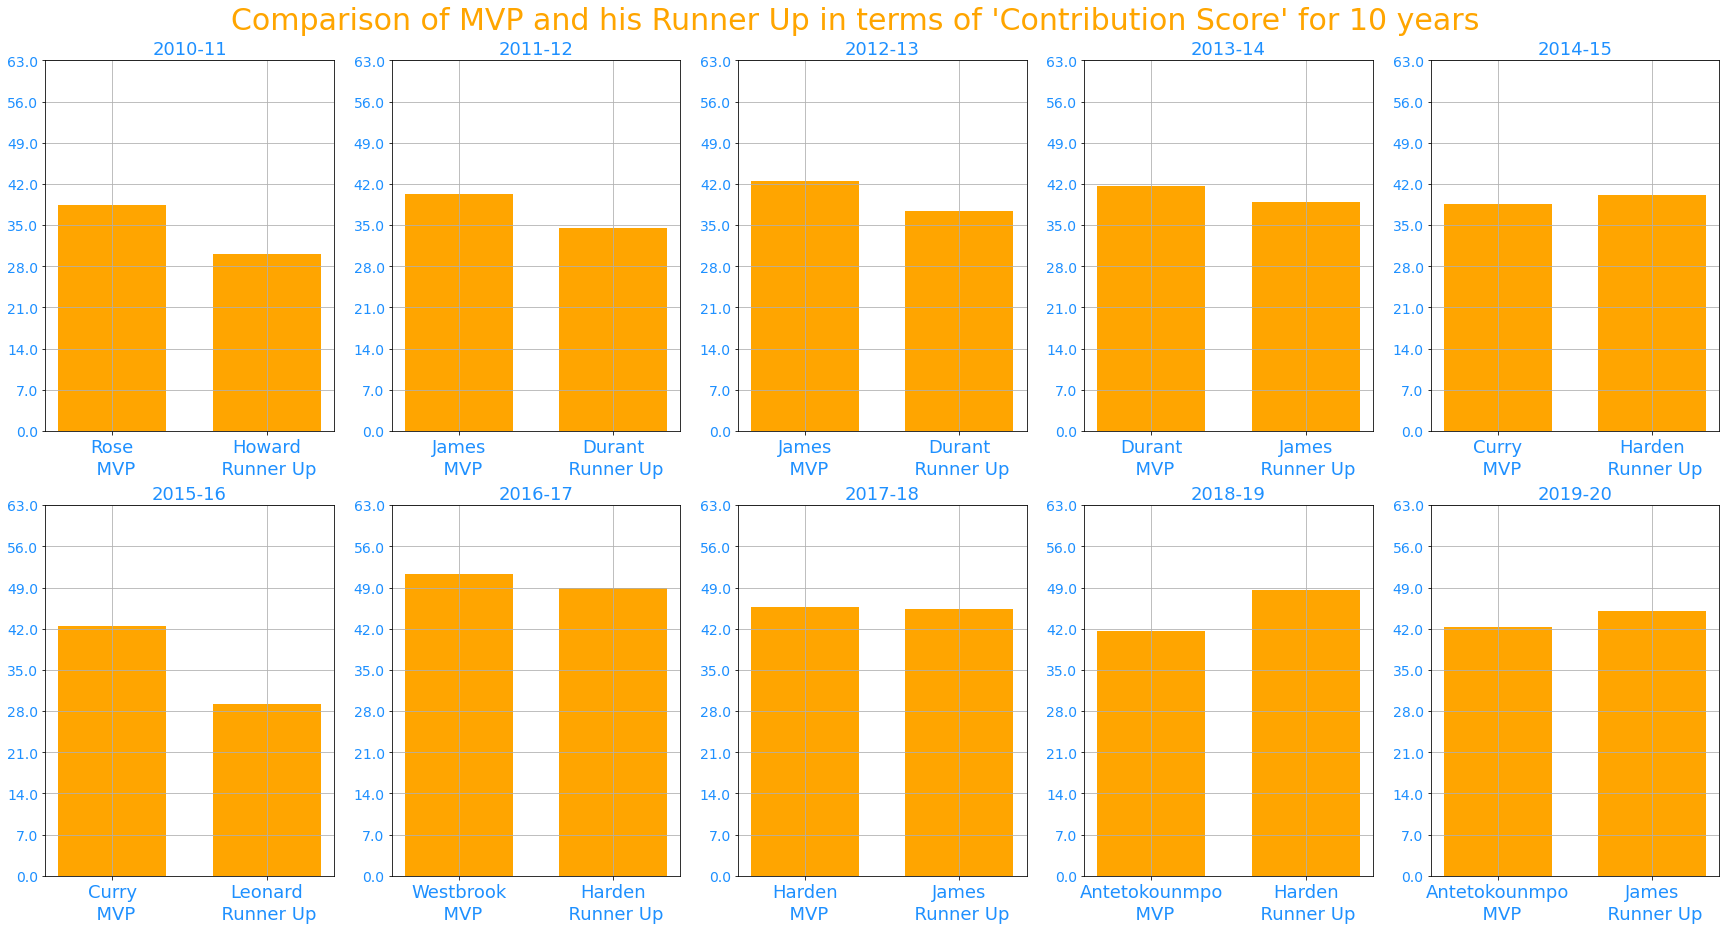

In [40]:
# plotting the results
fig, axs = plt.subplots(2,5, figsize = (30,15))

mvpYearList = ['2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19','2019-20']
contributionScoreGraphList = list(zip(MVPContributionScoreList, MVPRunnerUpContributionScoreList))
nameGraphList = list(zip(mvpNamesArr, runnerUpNamesArr))
i = 0
for ax in axs.ravel():
    name = [mvpNamesArr[i].split(' ')[1], runnerUpNamesArr[i].split(' ')[1]]
    score = [MVPContributionScoreList[i], MVPRunnerUpContributionScoreList[i]]
    ax.bar(name, score, width=0.7, align='center', color='orange')
    ax.set_xticks(np.linspace(0,2, endpoint=False, num=2))
    ax.set_xticklabels(name, fontdict={'size':18, 'color': 'dodgerblue'})
    ax.set_title(mvpYearList[i], fontdict={'size':18, 'color': 'dodgerblue'})
    ax.set_xlabel('      MVP               Runner Up', fontdict={'size':18, 'color': 'dodgerblue'})
    ax.set_yticks(np.linspace(0,70,num=10,endpoint=True))
    ax.set_yticklabels(np.linspace(0,70, num=10, endpoint=False), fontdict={'size':14, 'color': 'dodgerblue'})
    ax.grid(True)
    i += 1

fig.suptitle('Comparison of MVP and his Runner Up in terms of \'Contribution Score\' for 10 years', y=0.93, fontsize=30, color='orange')
plt.show()


### Discussion for Q1
It seems like our metric supports the decision of MVP for the last 10 years. 7 out of 10 MVP's scored higher than their respective runner up. If we check the 3 examples, according to our metric: 
-   James Harden should have been the MVP over Stephen Curry (2014-2015)
-   James Harden should have been the MVP over Giannis Antetekounmpo (2018-2019)
-   LeBron James should have been the MVP over Giannis Antetekounmpo (2019-2020)




## 2nd Question
#### How does a team's average age affect the win rate of their regular reason in 15 years? Is there a correlation?


For this analysis, we'll use the season data for the period between 2001-2016.

To have success, we need to have few steps:
1. Try to extract the data of 'average age - season' for the teams, plot it. 
2. Get the data of 'winning rate - season' for the teams and plot it.
3. Combine two datas and visualize it.
4. Use the sklearn library's Linear regression feature to create a trendline to see if average age has any correlation with the winning rates of the team.

We'll follow these steps in the code. Between the steps, you can see it from the comments. 


Note: Since there are a lot of data points for this specific question, we wanted to keep the figures big to prevent too much overlapping points. But as a result this makes the points in figures really small. So, if you would like to examine the details we recommend opening the images on a new tab or downloading them.



In [26]:
# Let's start with the 1st step
fname = "./datasets/all_seasons.csv"
df = pd.read_csv(fname)

df2 = df.groupby(['team_abbreviation', 'season']).mean()
df2 = df2.drop(columns = ['Unnamed: 0'])
df2 = df2.drop(columns = df2.iloc[:, 1:])
df2 = df2.reset_index()
yearArr = np.array(['2001-02','2002-03','2003-04','2004-05','2005-06','2006-07','2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16'])
teamArr = np.array(['ATL','BKN','BOS','CHA','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NOK','NOP','NYK','OKC','ORL','PHI','PHX','POR','SAC','SAS','SEA','TOR','UTA','VAN','WAS'])

fname2 = "./datasets/nba_win_rates.xlsx"
df3 = pd.read_excel(fname2)
df3 = df3.drop(df3.iloc[:, 4:], axis=1)

#fixing the names
completeTeamArr = np.array(teamArr.copy())
missingTeamIndex = [1,3,4,19,20,21,22,24,28,31,34]
completeTeamArr = np.delete(completeTeamArr, missingTeamIndex)

# creating other name list
completeTeamNameArr = ['Hawks','Celtics','Bulls','Cavaliers', 'Mavericks','Nuggets', 'Pistons', 'Warriors','Rockets','Pacers','Clippers','Lakers', 'Grizzlies','Heat','Bucks','Timberwolves','Knicks','Magic','76ers','Suns','Kings','Spurs','Raptors','Jazz','Wizards']

ageList = [ ]
rateList = [ ]
for i in range(len(completeTeamArr)):
    for j in range(len(yearArr)):
        ageList.append(df2.loc[df2['team_abbreviation'] == completeTeamArr[i]].loc[df2['season'] == yearArr[j]]['age'].values)
        rateList.append(df3.loc[df3['Team'] == str(completeTeamNameArr[i])].iloc[15-j]['Winning Percentage'])


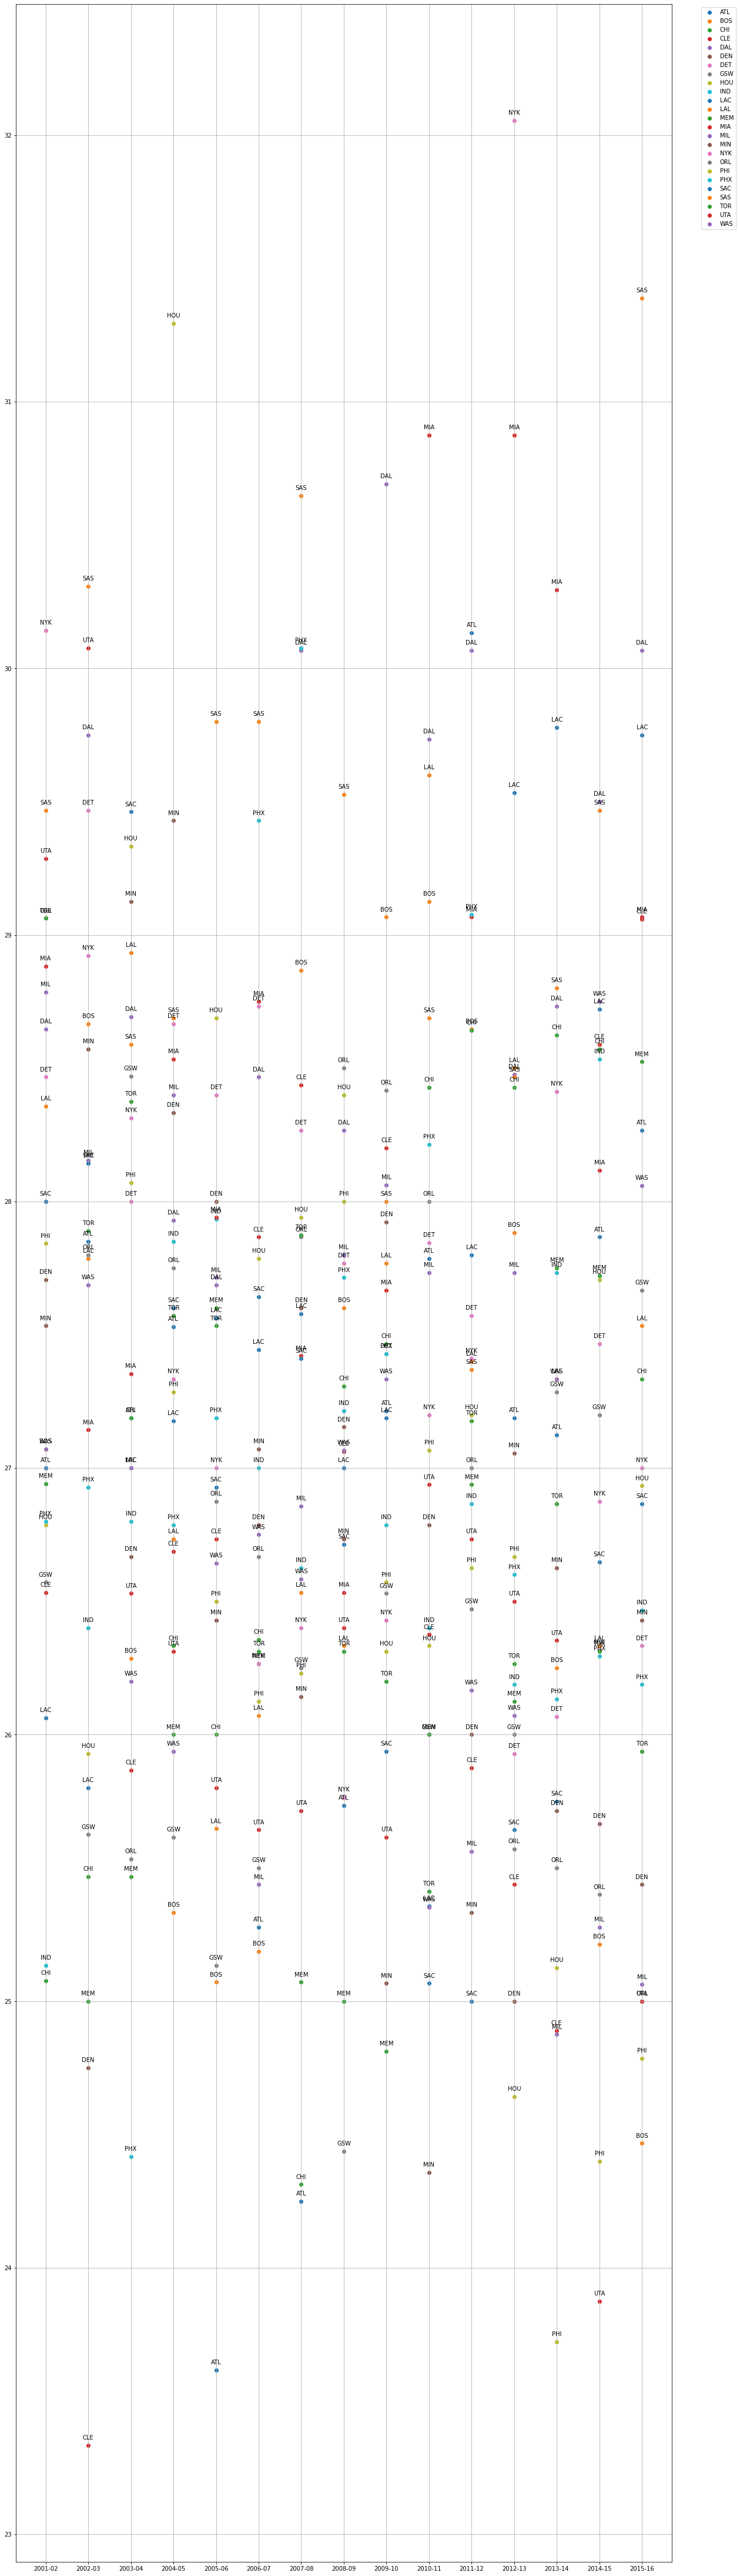

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (20,80))
count = 0

tempYearList = yearArr.tolist() * 25

for x in range(len(completeTeamArr)):
    ax.scatter(yearArr, np.array(ageList[count:count+15]), label = completeTeamArr[x])
    for i in range(15):
        plt.annotate(completeTeamArr[x], list(zip(tempYearList, np.array(ageList)))[count+i], 
                     textcoords="offset points", xytext=(0,10), ha='center')
    count += 15


ax.set_yticks(np.linspace(23,33, num=10, endpoint=False))
ax.set_xticks(np.linspace(0,15,num=15, endpoint=False))
ax.set_xticklabels(yearArr)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")


plt.grid(True)
plt.show()

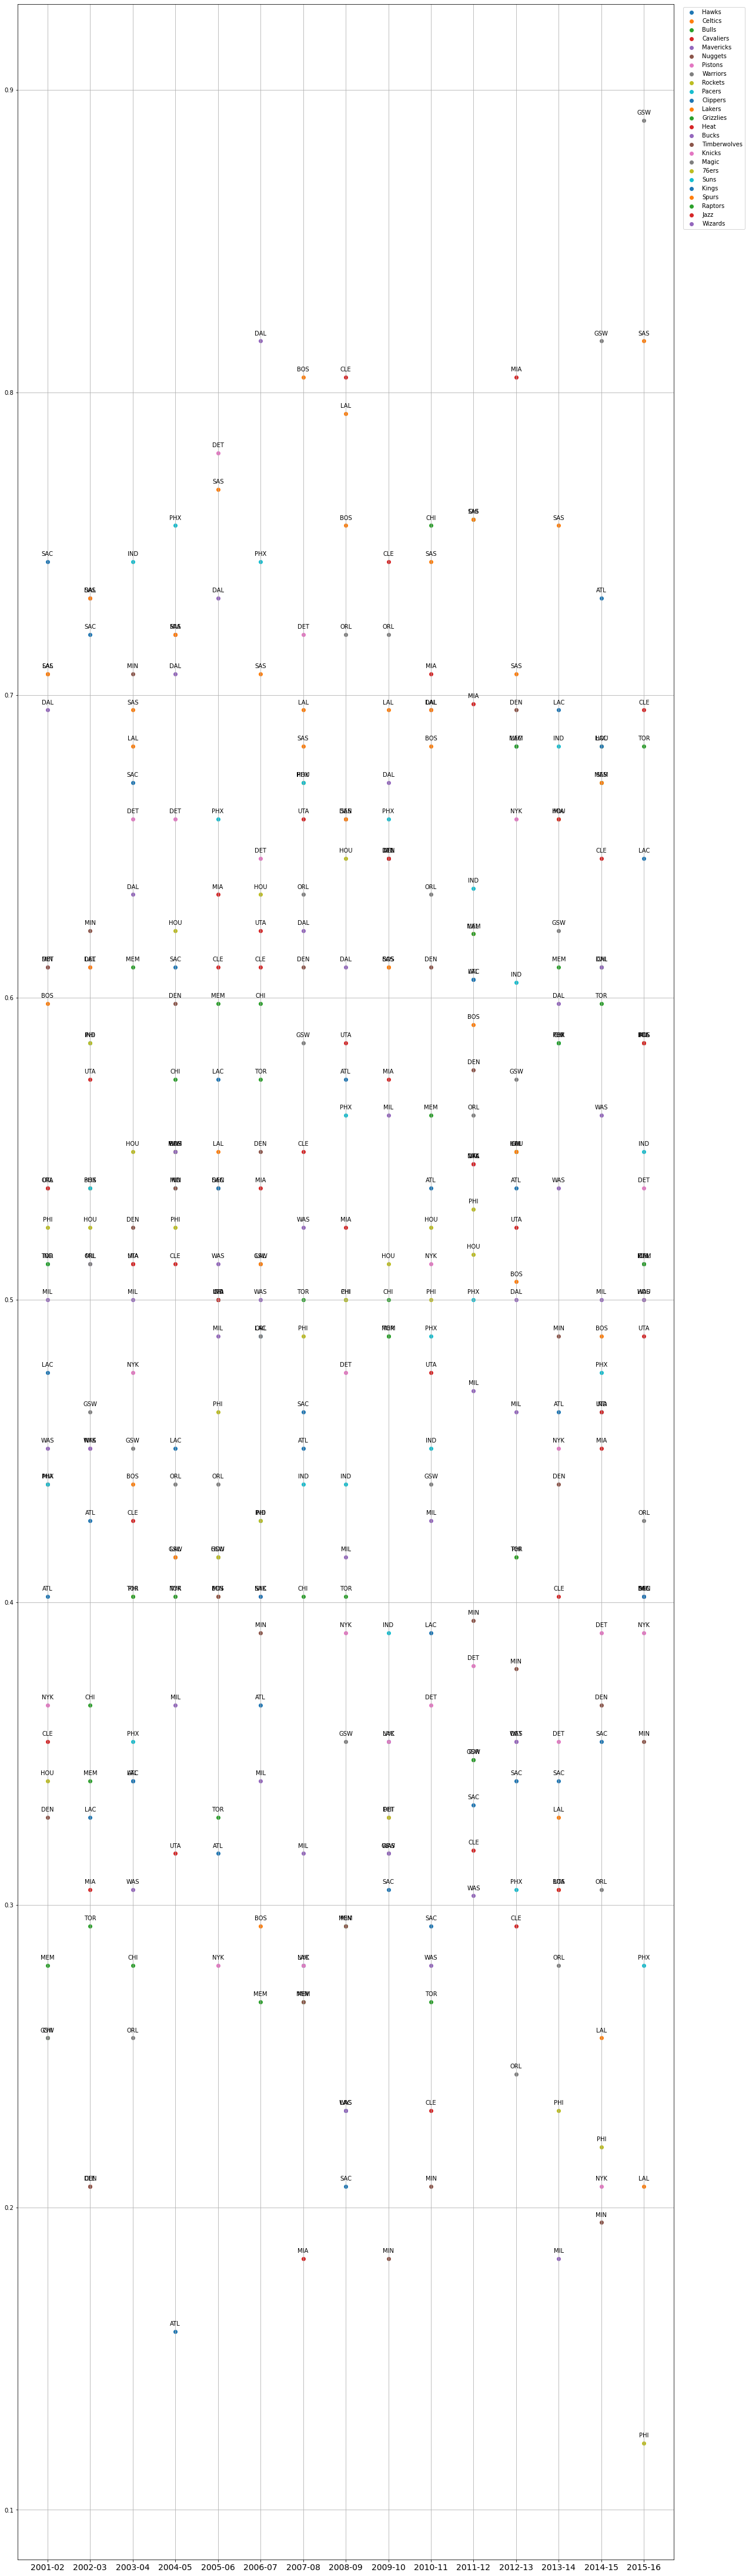

In [28]:
# 2nd step
fig, ax = plt.subplots(1, 1, figsize = (20,80))
count = 0

for x in range(len(completeTeamArr)):
    ax.scatter(yearArr, rateList[count:count+15], label = completeTeamNameArr[x])
    for i in range(15):
        plt.annotate(completeTeamArr[x], list(zip(tempYearList, np.array(rateList)))[count+i], 
                     textcoords="offset points", xytext=(0,10), ha='center')
    count += 15


ax.set_xticks(np.linspace(0,15,num=15, endpoint=False))
ax.set_xticklabels(yearArr, fontdict={'size' : 14})
ax.legend(bbox_to_anchor=(1.01,1), loc="upper left")

plt.grid(True)
plt.show()

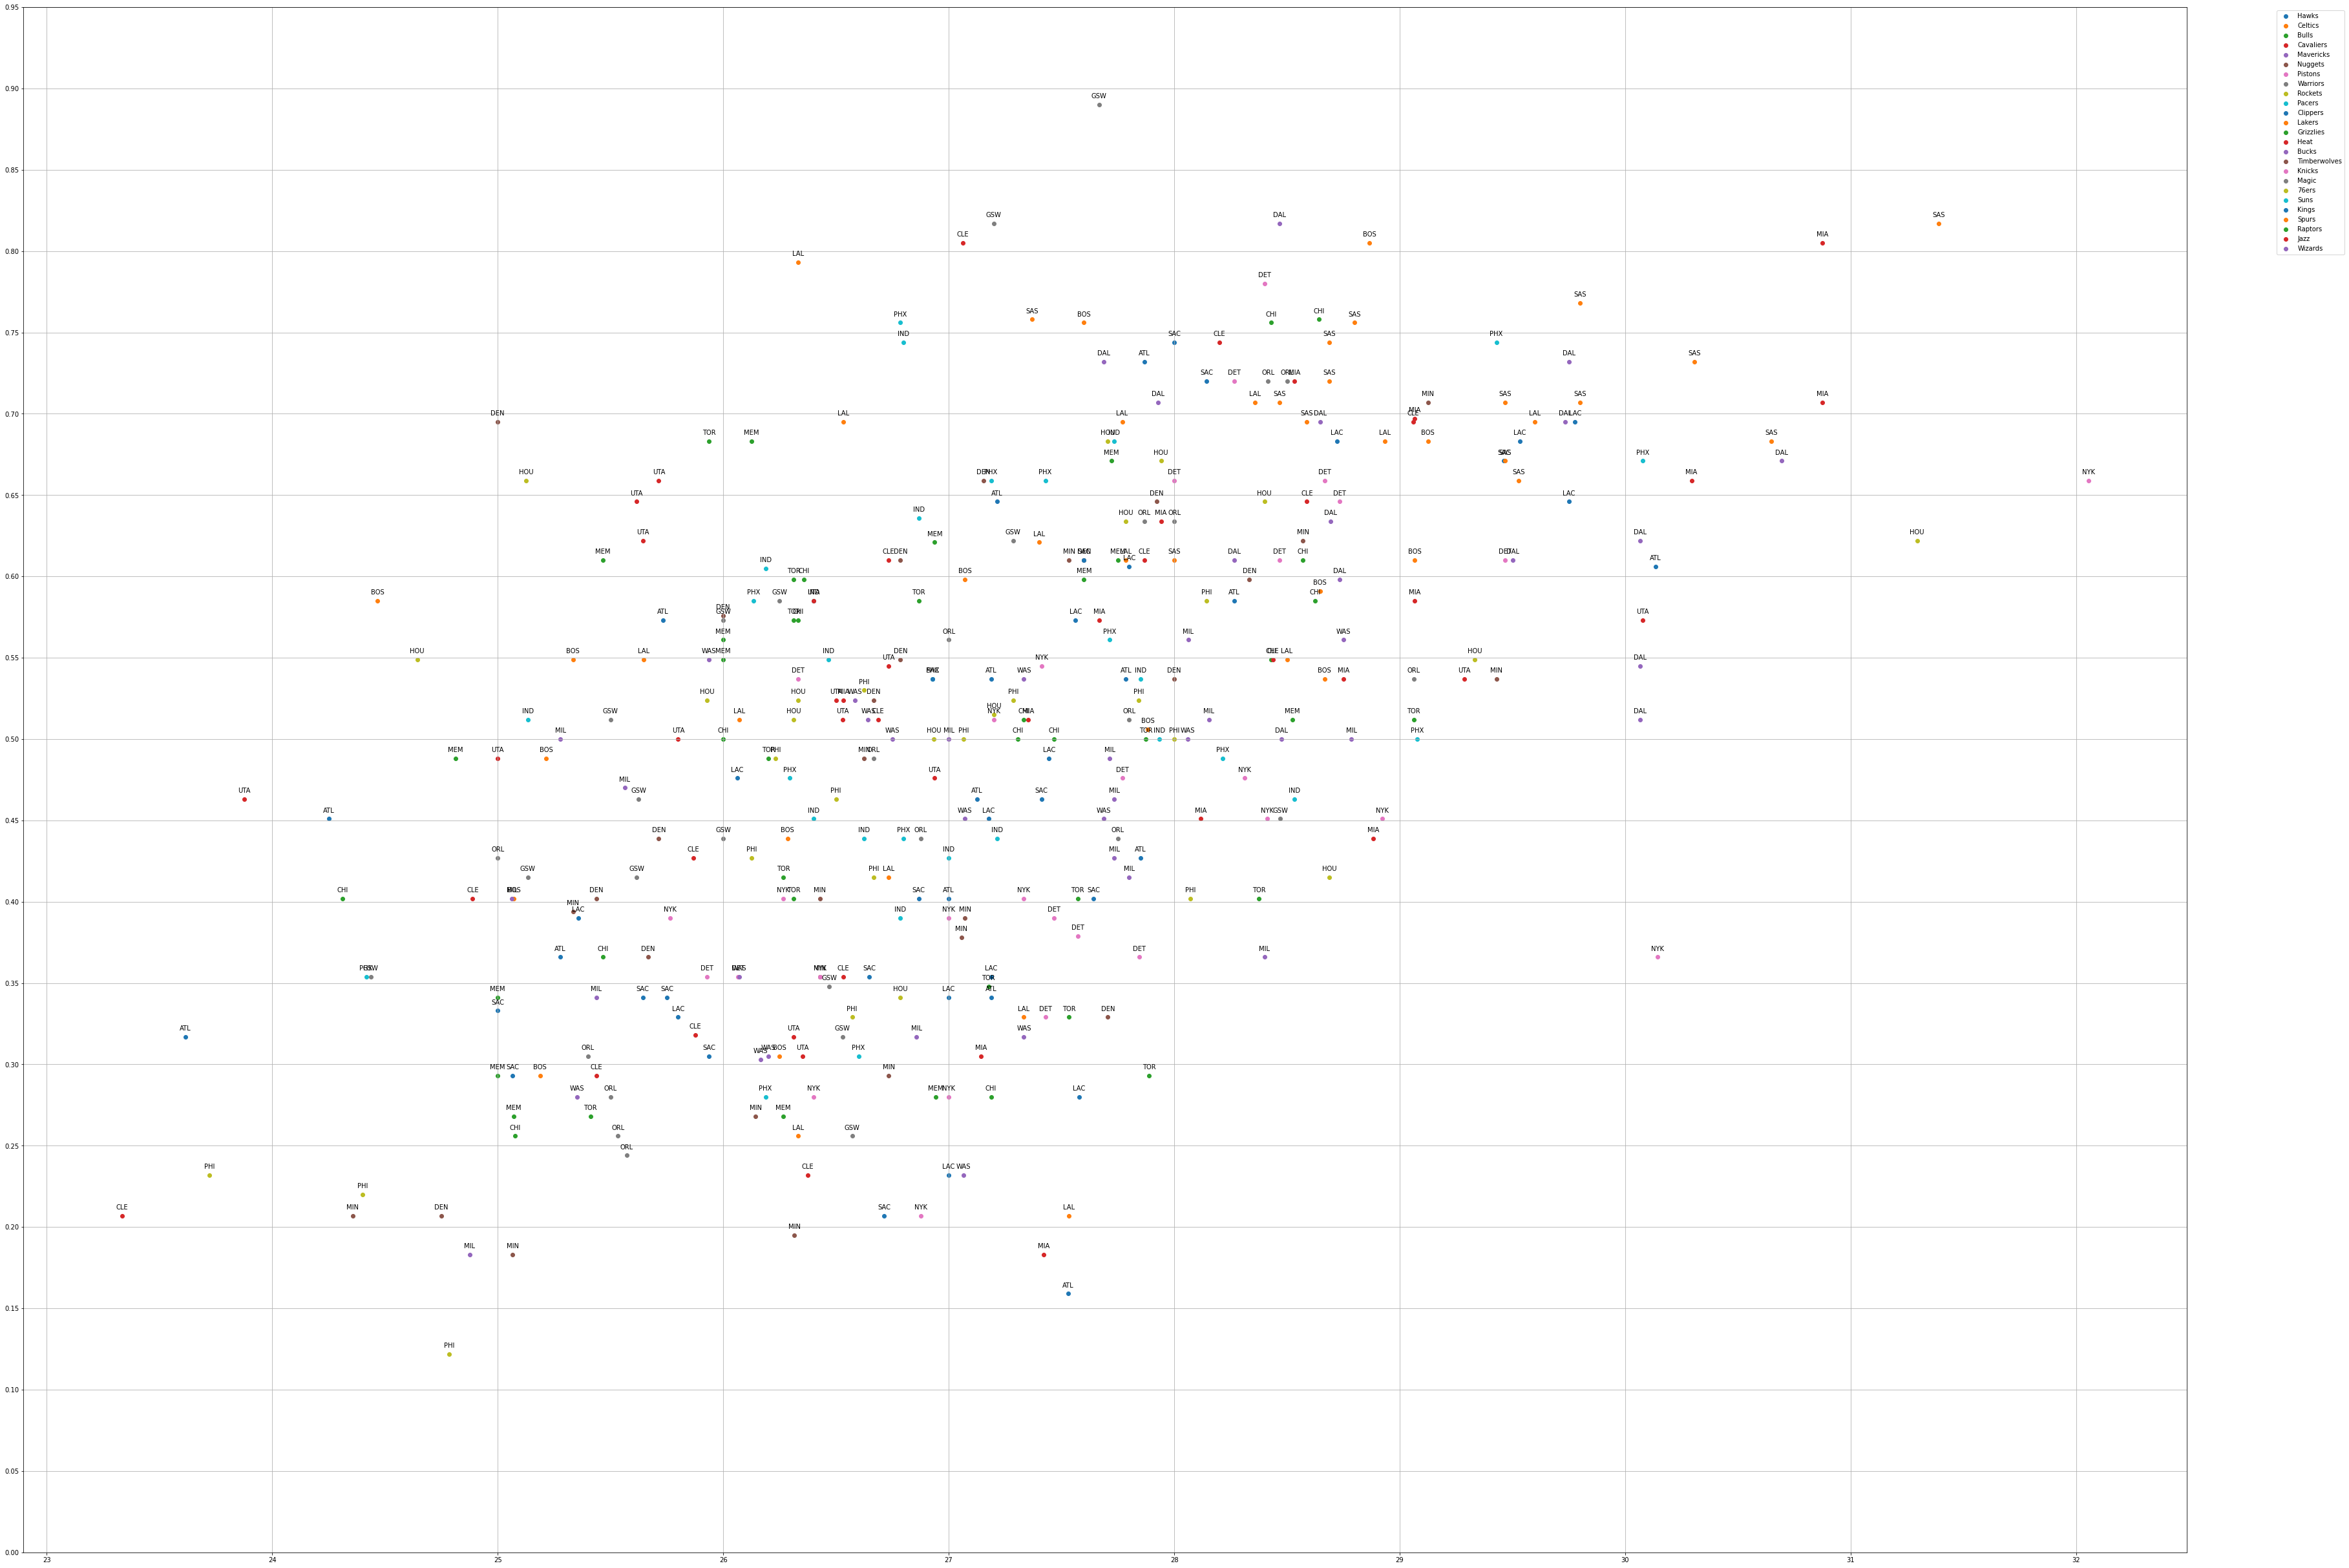

In [41]:
# 3rd step
fig, ax = plt.subplots(1, 1, figsize = (60,44))
count = 0

for x in range(len(completeTeamArr)):
    ax.scatter(ageList[count:count+15], rateList[count:count+15], label = completeTeamNameArr[x])
    for i in range(15):
        plt.annotate(completeTeamArr[x], list(zip(np.array(ageList), np.array(rateList)))[count+i], 
                     textcoords="offset points", xytext=(0,10), ha='center')
    count += 15


ax.set_xticks(np.linspace(23,33, num=10, endpoint=False))
ax.set_yticks(np.linspace(0,1, num=20, endpoint=False))
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid(True)
plt.show()

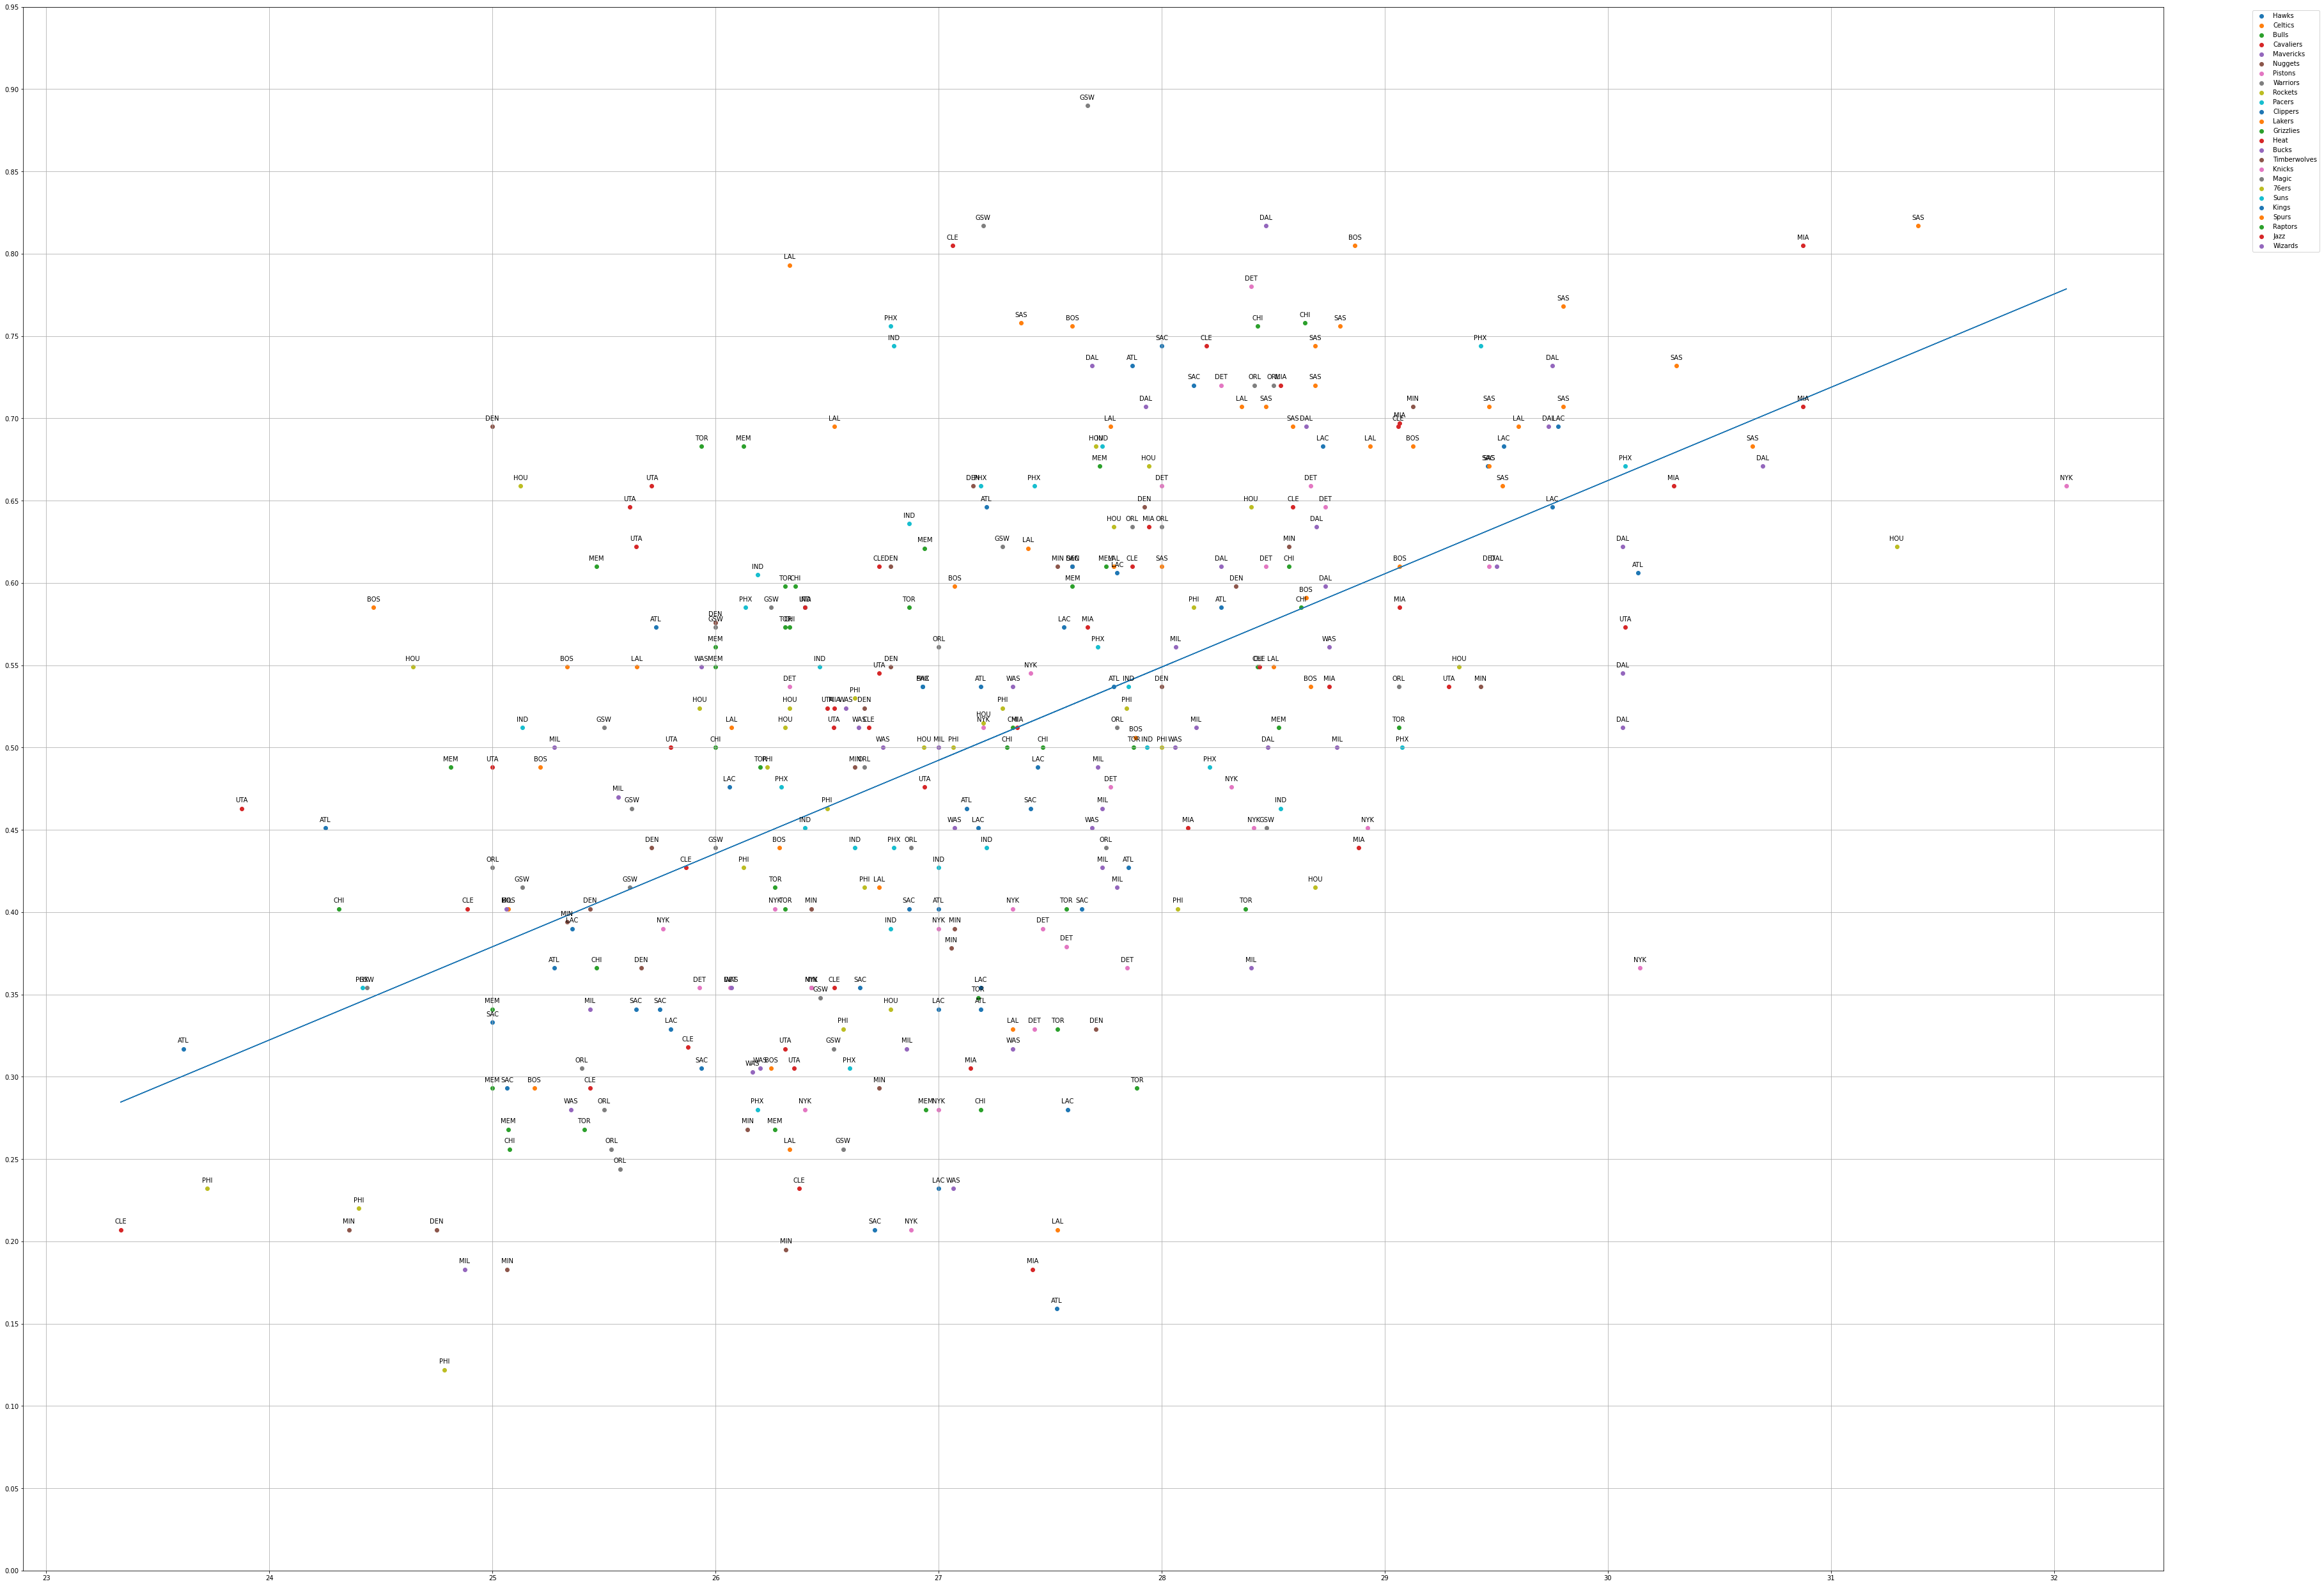

In [42]:
# 4th step
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(ageList, rateList)

r_sq = model.score(ageList, rateList)
m = model.coef_
b = model.intercept_

y = m*x + b
yList = [ ]

for i in ageList:
    yList.append(m*i+b)

fig, ax = plt.subplots(1, 1, figsize = (60,45))
count = 0

for x in range(len(completeTeamArr)):
    ax.scatter(ageList[count:count+15], rateList[count:count+15], label = completeTeamNameArr[x])
    for i in range(15):
        plt.annotate(completeTeamArr[x], list(zip(np.array(ageList), np.array(rateList)))[count+i], 
                     textcoords="offset points", xytext=(0,10), ha='center')
    count += 15

ax.plot(ageList, yList)

ax.set_xticks(np.linspace(23,33, num=10, endpoint=False))
ax.set_yticks(np.linspace(0,1, num=20, endpoint=False))
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid(True)
plt.show()

### Discussion for Q2

**"You get the joy of basketball with youngsters but you win championships with veterans..."**
                                    
                                    - A General Manager in NBA, probably

I believe I always hear this kind of quotes from players, GMs, coaches now and then. But when I wanted to add it in this report I couldn't find any specific one. Anyway, like these wise words suggest, we can clearly see a correlation between average age and winning rate. And it makes sense, veteran players have a lot more experience about the game itself and generally they peaked their skill potentials. In other words 'they are in their prime'. It is normal for teams having more of these players would win more games than the others. 

Of course it is not a causation either, and we don't have much data when we move over to +31-32 average aged teams because team planning dynamics does not work like that in NBA. But from simple observation, we know that aged players are more open to having problems with their bodies (injuries, load managements) which leads to absences. Because of that, although teams know that veterans players have better effect on win-now mentality for the teams, they avoid filling all their roster with them. But of course, this statements are debatable and out of scope for this project.

## 3rd Question
#### What is the statistical jump of the players who won the MIP (Most improved player award) between the year they are awarded and prior? This question will include the data for the last two decades.

Every year 'Most Improved Player' brings excitement to the league because generally there are a lot of candidates for this award. This increases the competition and as a result, controversies... So, lets dive into the stats to find out what is the primary reason to consider these players to have the best 'breakout year'. Let's visualize to compare their main stats between the breakout year and the previous year to see how better they performed to get the award.

We divided the main stats into different figures to prevent confusion and used bar charts to illustrate them clearly.


In [35]:
fname = "./datasets/players_stats_by_season_full_details.csv"
df = pd.read_csv(fname)

justNBADf = df.loc[df['League'] == 'NBA']

mostImprovedRawText = '2019-20 Brandon Ingram, New Orleans Pelicans (Voting)\n2018-19 Pascal Siakam, Toronto Raptors (Voting)\n2017-18 Victor Oladipo, Indiana Pacers (Voting)\n2016-17 Giannis Antetokounmpo, Milwaukee Bucks (Voting)\n2015-16 C.J. McCollum, Portland Trail Blazers (Voting)\n2014-15 Jimmy Butler, Chicago Bulls\n2013-14 Goran Dragic, Phoenix Suns\n2012-13 Paul George, Indiana Pacers\n2011-12 Ryan Anderson, Orlando Magic\n2010-11 Kevin Love, Minnesota Timberwolves\n2009-10 Aaron Brooks, Houston Rockets\n2008-09 Danny Granger, Indiana Pacers\n2007-08 Hedo Turkoglu, Orlando Magic\n2006-07 Monta Ellis, Golden State Warriors\n2005-06 Boris Diaw, Phoenix Suns\n2004-05 Bobby Simmons, LA Clippers\n2003-04 Zach Randolph, Portland Trail Blazers\n2002-03 Gilbert Arenas, Golden State Warriors\n2001-02 Jermaine O’Neal, Indiana Pacers\n2000-01 Tracy McGrady, Orlando Magic'

tempList = mostImprovedRawText.strip().split('\n')
items = []
items2 = []
for item in tempList:
    items.append(item.split(','))
for item in items:
    item[1] = item[1].strip()
    item[0] = item[0].split(' ', 1)
    item.append(item[0][0])
    item[0] = item[0][1]
    item[2] = f'{(item[2])[0:4]} - 20{(item[2])[5:]}'
for i in range(5):
    items[i][1] = (items[i][1])[0:len(items[i][1]) - 9]

mostImprovedArr = np.array(items)

previousYearsArr = np.append(mostImprovedArr[1:,2], ('1999 - 2000'))

statArraySize = mostImprovedArr.shape[0]

PtsPerGameArr = []
MinutesPerGameArr = []
AssistsPerGameArr = []
ReboundsPerGameArr = []
StealsPerGameArr = []
BlocksPerGameArr = []
TotalGamesArr = []

prePtsPerGameArr = []
preMinutesPerGameArr = []
preAssistsPerGameArr = []
preReboundsPerGameArr = []
preStealsPerGameArr = []
preBlocksPerGameArr = []
preTotalGamesArr = []

for i in range(len(mostImprovedArr)):
    TotalGamesArr.append(justNBADf.loc[(justNBADf['Player'] == mostImprovedArr[i][0].strip()) & (justNBADf['Season'] == mostImprovedArr[i][2]) & (justNBADf['Stage'] == 'Regular_Season')]['GP'].values)
    PtsPerGameArr.append(((justNBADf.loc[(justNBADf['Player'] == mostImprovedArr[i][0].strip()) & (justNBADf['Season'] == mostImprovedArr[i][2]) & (justNBADf['Stage'] == 'Regular_Season')]['PTS'].values) / TotalGamesArr[i]))  
    MinutesPerGameArr.append(((justNBADf.loc[(justNBADf['Player'] == mostImprovedArr[i][0].strip()) & (justNBADf['Season'] == mostImprovedArr[i][2]) & (justNBADf['Stage'] == 'Regular_Season')]['MIN'].values) / TotalGamesArr[i])) 
    AssistsPerGameArr.append(((justNBADf.loc[(justNBADf['Player'] == mostImprovedArr[i][0].strip()) & (justNBADf['Season'] == mostImprovedArr[i][2]) & (justNBADf['Stage'] == 'Regular_Season')]['AST'].values) / TotalGamesArr[i])) 
    ReboundsPerGameArr.append(((justNBADf.loc[(justNBADf['Player'] == mostImprovedArr[i][0].strip()) & (justNBADf['Season'] == mostImprovedArr[i][2]) & (justNBADf['Stage'] == 'Regular_Season')]['REB'].values) / TotalGamesArr[i])) 
    StealsPerGameArr.append(((justNBADf.loc[(justNBADf['Player'] == mostImprovedArr[i][0].strip()) & (justNBADf['Season'] == mostImprovedArr[i][2]) & (justNBADf['Stage'] == 'Regular_Season')]['STL'].values) / TotalGamesArr[i])) 
    BlocksPerGameArr.append(((justNBADf.loc[(justNBADf['Player'] == mostImprovedArr[i][0].strip()) & (justNBADf['Season'] == mostImprovedArr[i][2]) & (justNBADf['Stage'] == 'Regular_Season')]['BLK'].values) / TotalGamesArr[i])) 

    preTotalGamesArr.append(justNBADf.loc[(justNBADf['Player'] == mostImprovedArr[i][0].strip()) & (justNBADf['Season'] == previousYearsArr[i]) & (justNBADf['Stage'] == 'Regular_Season')]['GP'].values)
    prePtsPerGameArr.append(((justNBADf.loc[(justNBADf['Player'] == mostImprovedArr[i][0].strip()) & (justNBADf['Season'] == previousYearsArr[i]) & (justNBADf['Stage'] == 'Regular_Season')]['PTS'].values) / preTotalGamesArr[i]))  
    preMinutesPerGameArr.append(((justNBADf.loc[(justNBADf['Player'] == mostImprovedArr[i][0].strip()) & (justNBADf['Season'] == previousYearsArr[i]) & (justNBADf['Stage'] == 'Regular_Season')]['MIN'].values) / preTotalGamesArr[i])) 
    preAssistsPerGameArr.append(((justNBADf.loc[(justNBADf['Player'] == mostImprovedArr[i][0].strip()) & (justNBADf['Season'] == previousYearsArr[i]) & (justNBADf['Stage'] == 'Regular_Season')]['AST'].values) / preTotalGamesArr[i])) 
    preReboundsPerGameArr.append(((justNBADf.loc[(justNBADf['Player'] == mostImprovedArr[i][0].strip()) & (justNBADf['Season'] == previousYearsArr[i]) & (justNBADf['Stage'] == 'Regular_Season')]['REB'].values) / preTotalGamesArr[i])) 
    preStealsPerGameArr.append(((justNBADf.loc[(justNBADf['Player'] == mostImprovedArr[i][0].strip()) & (justNBADf['Season'] == previousYearsArr[i]) & (justNBADf['Stage'] == 'Regular_Season')]['STL'].values) / preTotalGamesArr[i])) 
    preBlocksPerGameArr.append(((justNBADf.loc[(justNBADf['Player'] == mostImprovedArr[i][0].strip()) & (justNBADf['Season'] == previousYearsArr[i]) & (justNBADf['Stage'] == 'Regular_Season')]['BLK'].values) / preTotalGamesArr[i])) 

a = list(zip(prePtsPerGameArr[0], PtsPerGameArr[0]))
ptsComparison = []
minComparison = []
astComparison = []
rebComparison = []
stlComparison = []
blkComparison = []


for i in range(len(TotalGamesArr)):
    ptsComparison.append(list(zip(prePtsPerGameArr[i], PtsPerGameArr[i])))
    minComparison.append(list(zip(preMinutesPerGameArr[i], MinutesPerGameArr[i])))
    astComparison.append(list(zip(preAssistsPerGameArr[i], AssistsPerGameArr[i])))
    rebComparison.append(list(zip(preReboundsPerGameArr[i], ReboundsPerGameArr[i])))
    stlComparison.append(list(zip(preStealsPerGameArr[i], StealsPerGameArr[i])))
    blkComparison.append(list(zip(preBlocksPerGameArr[i], BlocksPerGameArr[i])))


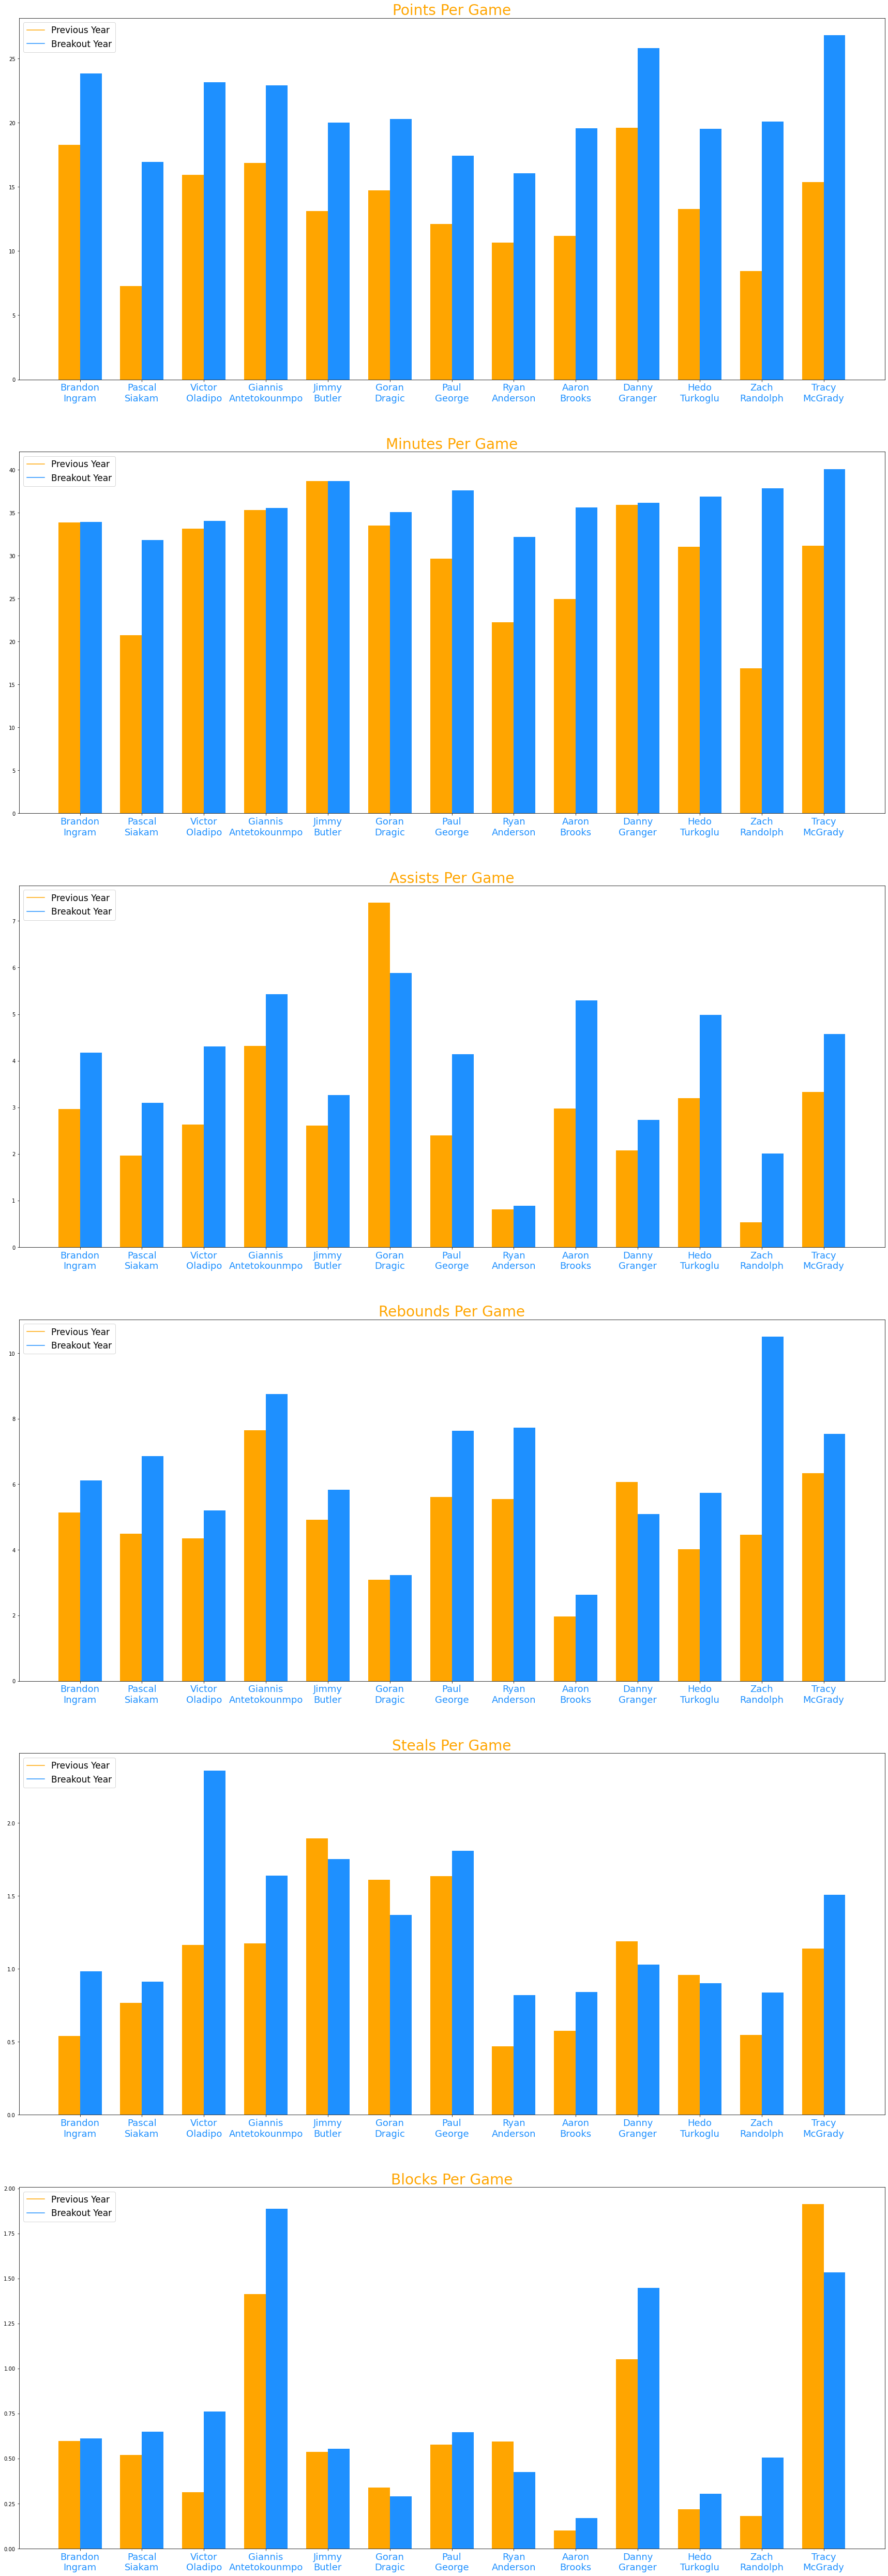

In [37]:
from matplotlib.lines import Line2D

width = 0.35  

fig, axs = plt.subplots(6,1,figsize=(30,90))
graphData = [ptsComparison, minComparison, astComparison, rebComparison, stlComparison, blkComparison]
titleList = ['Points Per Game', 'Minutes Per Game', 'Assists Per Game', 'Rebounds Per Game', 'Steals Per Game', 'Blocks Per Game']

namesForLabel = [ ]
for i in range(len(mostImprovedArr)):
    if len(ptsComparison[i]) == 1:
        namesForLabel.append(mostImprovedArr[i,0])

for i in range(len(namesForLabel)):
    namesForLabel[i] = namesForLabel[i].replace(' ', '\n')

dataIdx = 0
for ax in axs.ravel():
    x = 0
    for i in range(len(mostImprovedArr)):
        if len(graphData[dataIdx][i]) == 1:
            rects1 = ax.bar(x - width/2, graphData[dataIdx][i][0][0], width, color='orange')
            rects2 = ax.bar(x + width/2, graphData[dataIdx][i][0][1], width, color='dodgerblue')
            x += 1
        else:
            pass
    ax.set_title(titleList[dataIdx], fontdict={'size':28, 'color':'orange'})
    ax.set_xticks(np.arange(x))
    ax.set_xticklabels(namesForLabel, fontdict={'size':18, 'color':'dodgerblue'})
    legend_elements = [Line2D([0], [0], color='orange', label='Previous Year'), Line2D([0], [0], color='dodgerblue', label='Breakout Year')]
    ax.legend(handles=legend_elements, loc='upper left', prop={'size':17})
    dataIdx += 1
    
plt.show()

### Discussion for Q3

First of all, although we targeted the last 20 years' MIPs stats, because of the deficits in the datasets we were able to get 13 player's data. You can see their names on the chart already. 


Well, as can be expected the primary factor for considering a player to have a breakout year is the 'points per game (ppg)'. We can easily say that all the players increased their ppg in their breakout year. We generally see a good increase in the other categories (Aaron Brooks nearly doubling his assists per game, Victor Oladipo increasing his steals per game from 1.2 to 2.3) too but none of them is that dramatic like ppg stats.

## Conclusion

We started to this project with some questions in mind, and with the tools and the datasets we have some answers for them. Results were not shocking, most of them were supporting the generally accepted views but nevertheless we really value the fact that we were able to support our perspective with the data science.

## Team Members
- Tan Çetiner
- Can Küçükyılmaz
- Bendecan Atik
- Umut Barış Ay
